##Firstly, data cleaning should be done.
##Train and test data is created according to the size of the data we have (we assume that customers are tagged).
##We start using the logistic regression algorithm, which is the most basic algorithm.We are building our logistic regression model with the data we have
##An error of our test data with the model  created

## Logistic Regression -49% of accuracy
## Random ForestClsssifier give us 72% of accu racy.
##XBosst:88%of accuracy
##To improve the results was used tuned parameters, cross-validation and Hyper Parameter Tuning (RandomizedSearchCV)

In [24]:
#import libraries 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
#read the csv file 
df = pd.read_csv('MiBolsillo.csv',encoding = 'unicode_escape',sep=';')
df.dataframeName = 'MiBolsillo.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4955 rows and 13 columns


In [26]:
df.head()

,id,safra_abertura,cidade,estado,idade,sexo,limite_total,limite_disp,data,valor,grupo_estabelecimento,cidade_estabelecimento,pais_estabelecimento
0,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,4.12.2019,31,SERVIO,SAO PAULO,BR
1,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,9.11.2019,"150,01",FARMACIAS,SANTOS,BR
2,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,6.05.2019,50,SERVIO,SAO PAULO,BR
3,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,1.06.2019,"54,4",M.O.T.O.,OSASCO,BR
4,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,1.06.2019,"32,79",M.O.T.O.,OSASCO,BR


In [27]:
#change name of the columns 
df.columns = ['id','branch_number','city','state','age','gender','total_credit_card_limit','current_available_limit' ,'date','amount','category_expense','purchase_city','purchase_country']

In [28]:
#converting the date variable to date_time format
df.date = pd.to_datetime(df.date,dayfirst=True)
df.head()

,id,branch_number,city,state,age,gender,total_credit_card_limit,current_available_limit,date,amount,category_expense,purchase_city,purchase_country
0,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,2019-12-04,31,SERVIO,SAO PAULO,BR
1,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,2019-11-09,"150,01",FARMACIAS,SANTOS,BR
2,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,2019-05-06,50,SERVIO,SAO PAULO,BR
3,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,2019-06-01,"54,4",M.O.T.O.,OSASCO,BR
4,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,2019-06-01,"32,79",M.O.T.O.,OSASCO,BR


In [29]:
#create a dataframe as customers with old and new customer names
customers = pd.DataFrame(df.id.unique())
customers.columns = ['old_customer_name']
new_list = list(range(1, len(customers)+1))
customers['new_customer_name'] = new_list
customers

,old_customer_name,new_customer_name
0,"4,53E+11",1
1,"4,23E+11",2
2,"5,91E+11",3
3,"8,61E+11",4
4,"6,51E+11",5
5,94873707154,6
6,"3,09E+11",7
7,"2,46E+11",8
8,"5,43E+11",9
9,"5,81E+11",10


In [30]:
# we need to float the type of amount variable
for i in range(0,len(df.amount)):
    df.amount[i] = df.amount[i].replace('.','').replace(',','.')

#I export values containing '-' in the amount variable as df_amount_nan
df_amount_nan = df[df.amount == ' -   ']

# There are '-' values in the amount column. I am deleting theese rows because we can't convert it to the float type with these values
df = df[df.amount != ' -   ']

# Now the amount variable is ready to convert to float type.
df.amount = df.amount.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
#converting the date variable to date_time format

df.date = pd.to_datetime(df.date,dayfirst=True)

In [32]:
#convert the gender variable to dummy_variable
dms = pd.get_dummies(df['gender'])
df = pd.concat([df,dms],axis=1)
df.drop(['gender', 'M'], axis=1,inplace=True)
df.rename(columns={'F': 'Female'}, inplace=True)
df

,id,branch_number,city,state,age,total_credit_card_limit,current_available_limit,date,amount,category_expense,purchase_city,purchase_country,Female
0,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,5605,2019-12-04,31.00,SERVIO,SAO PAULO,BR,1
1,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,5343,2019-11-09,150.01,FARMACIAS,SANTOS,BR,1
2,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,2829,2019-05-06,50.00,SERVIO,SAO PAULO,BR,1
3,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,2547,2019-06-01,54.40,M.O.T.O.,OSASCO,BR,1
4,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,2515,2019-06-01,32.79,M.O.T.O.,OSASCO,BR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,"9,19E+11",201910,SAO PAULO,SP,37,8500,5305,2020-01-23,25.50,RESTAURANTE,SAO PAULO,BR,0
4951,"9,19E+11",201910,SAO PAULO,SP,37,8500,5266,2020-01-23,39.50,SUPERMERCADOS,SAO PAULO,BR,0
4952,"9,19E+11",201910,SAO PAULO,SP,37,8500,5445,2020-02-19,75.56,RESTAURANTE,SAO PAULO,BR,0
4953,"9,19E+11",201910,SAO PAULO,SP,37,8500,5002,2020-03-30,5.90,SERVIO,SAO PAULO,BR,0


In [33]:
# I look at the total spending of each customer
total = df.groupby('id')[['amount']].sum().sort_values('amount',ascending=False)
total.rename(columns={'amount': 'Total_spending'}, inplace=True)
total

,Total_spending
id,
"6,06E+11",151744.49
"1,00E+12",46792.97
"3,31E+11",39500.85
"2,21E+11",37023.41
"5,02E+11",31114.48
"8,61E+11",25350.47
"5,38E+11",21523.28
"9,54E+11",19785.22
"8,14E+11",18700.03


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


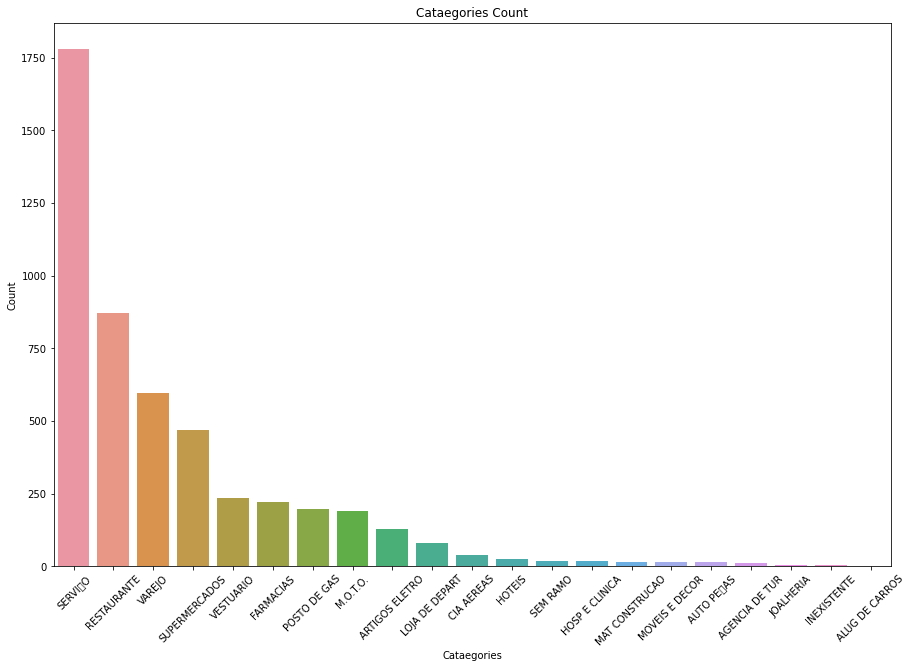

In [34]:

# I want to look at the total expense in each category
categ = df.category_expense.value_counts().sort_values(ascending=False)


plt.figure(figsize=(15,10))
sns.barplot(x=categ.index,y=categ.values)
plt.xlabel('Cataegories')
plt.ylabel('Count')
plt.title("Cataegories Count")
plt.xticks(rotation= 45);

In [35]:
#the number of transactions each client has with a credit card
freq = df.groupby('id')[['amount']].count().sort_values('amount',ascending=False)
freq.rename(columns={'amount': 'Frequency'}, inplace=True)
freq

,Frequency
id,
"5,02E+11",694
"6,51E+11",510
"3,31E+11",457
"2,21E+11",268
94873707154,257
"5,38E+11",257
"6,06E+11",249
"5,91E+11",209
"9,54E+11",192


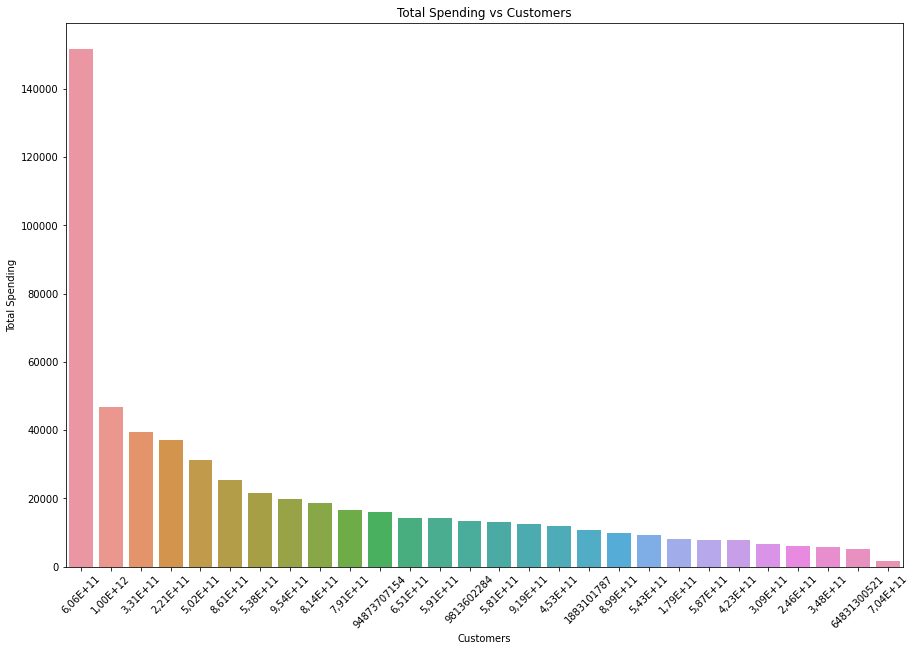

In [36]:
#look at the total spending of each customer
plt.figure(figsize=(15,10))
sns.barplot(x=total.index,y=total['Total_spending'])
plt.xlabel('Customers')
plt.ylabel('Total Spending')
plt.title("Total Spending vs Customers")
plt.xticks(rotation= 45);

In [37]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


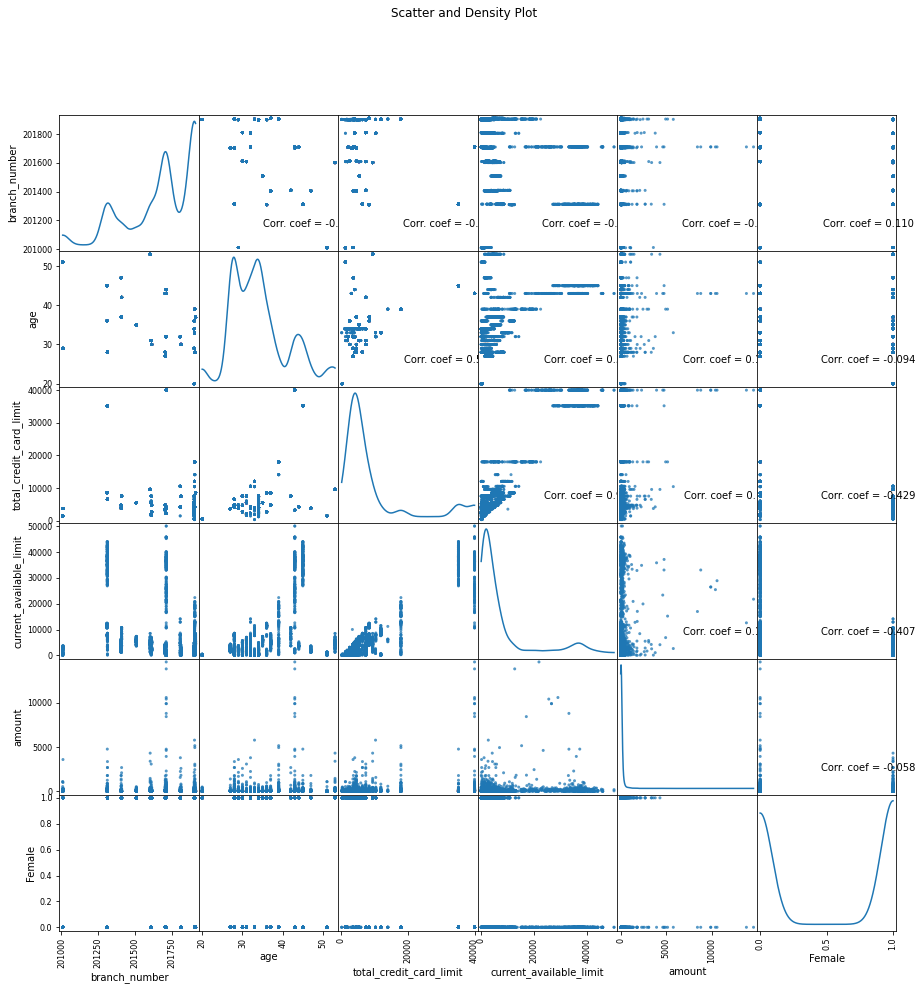

In [38]:
#correlation between variables 
plotScatterMatrix(df, 15, 10)

In [39]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
# Correlation matrix

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


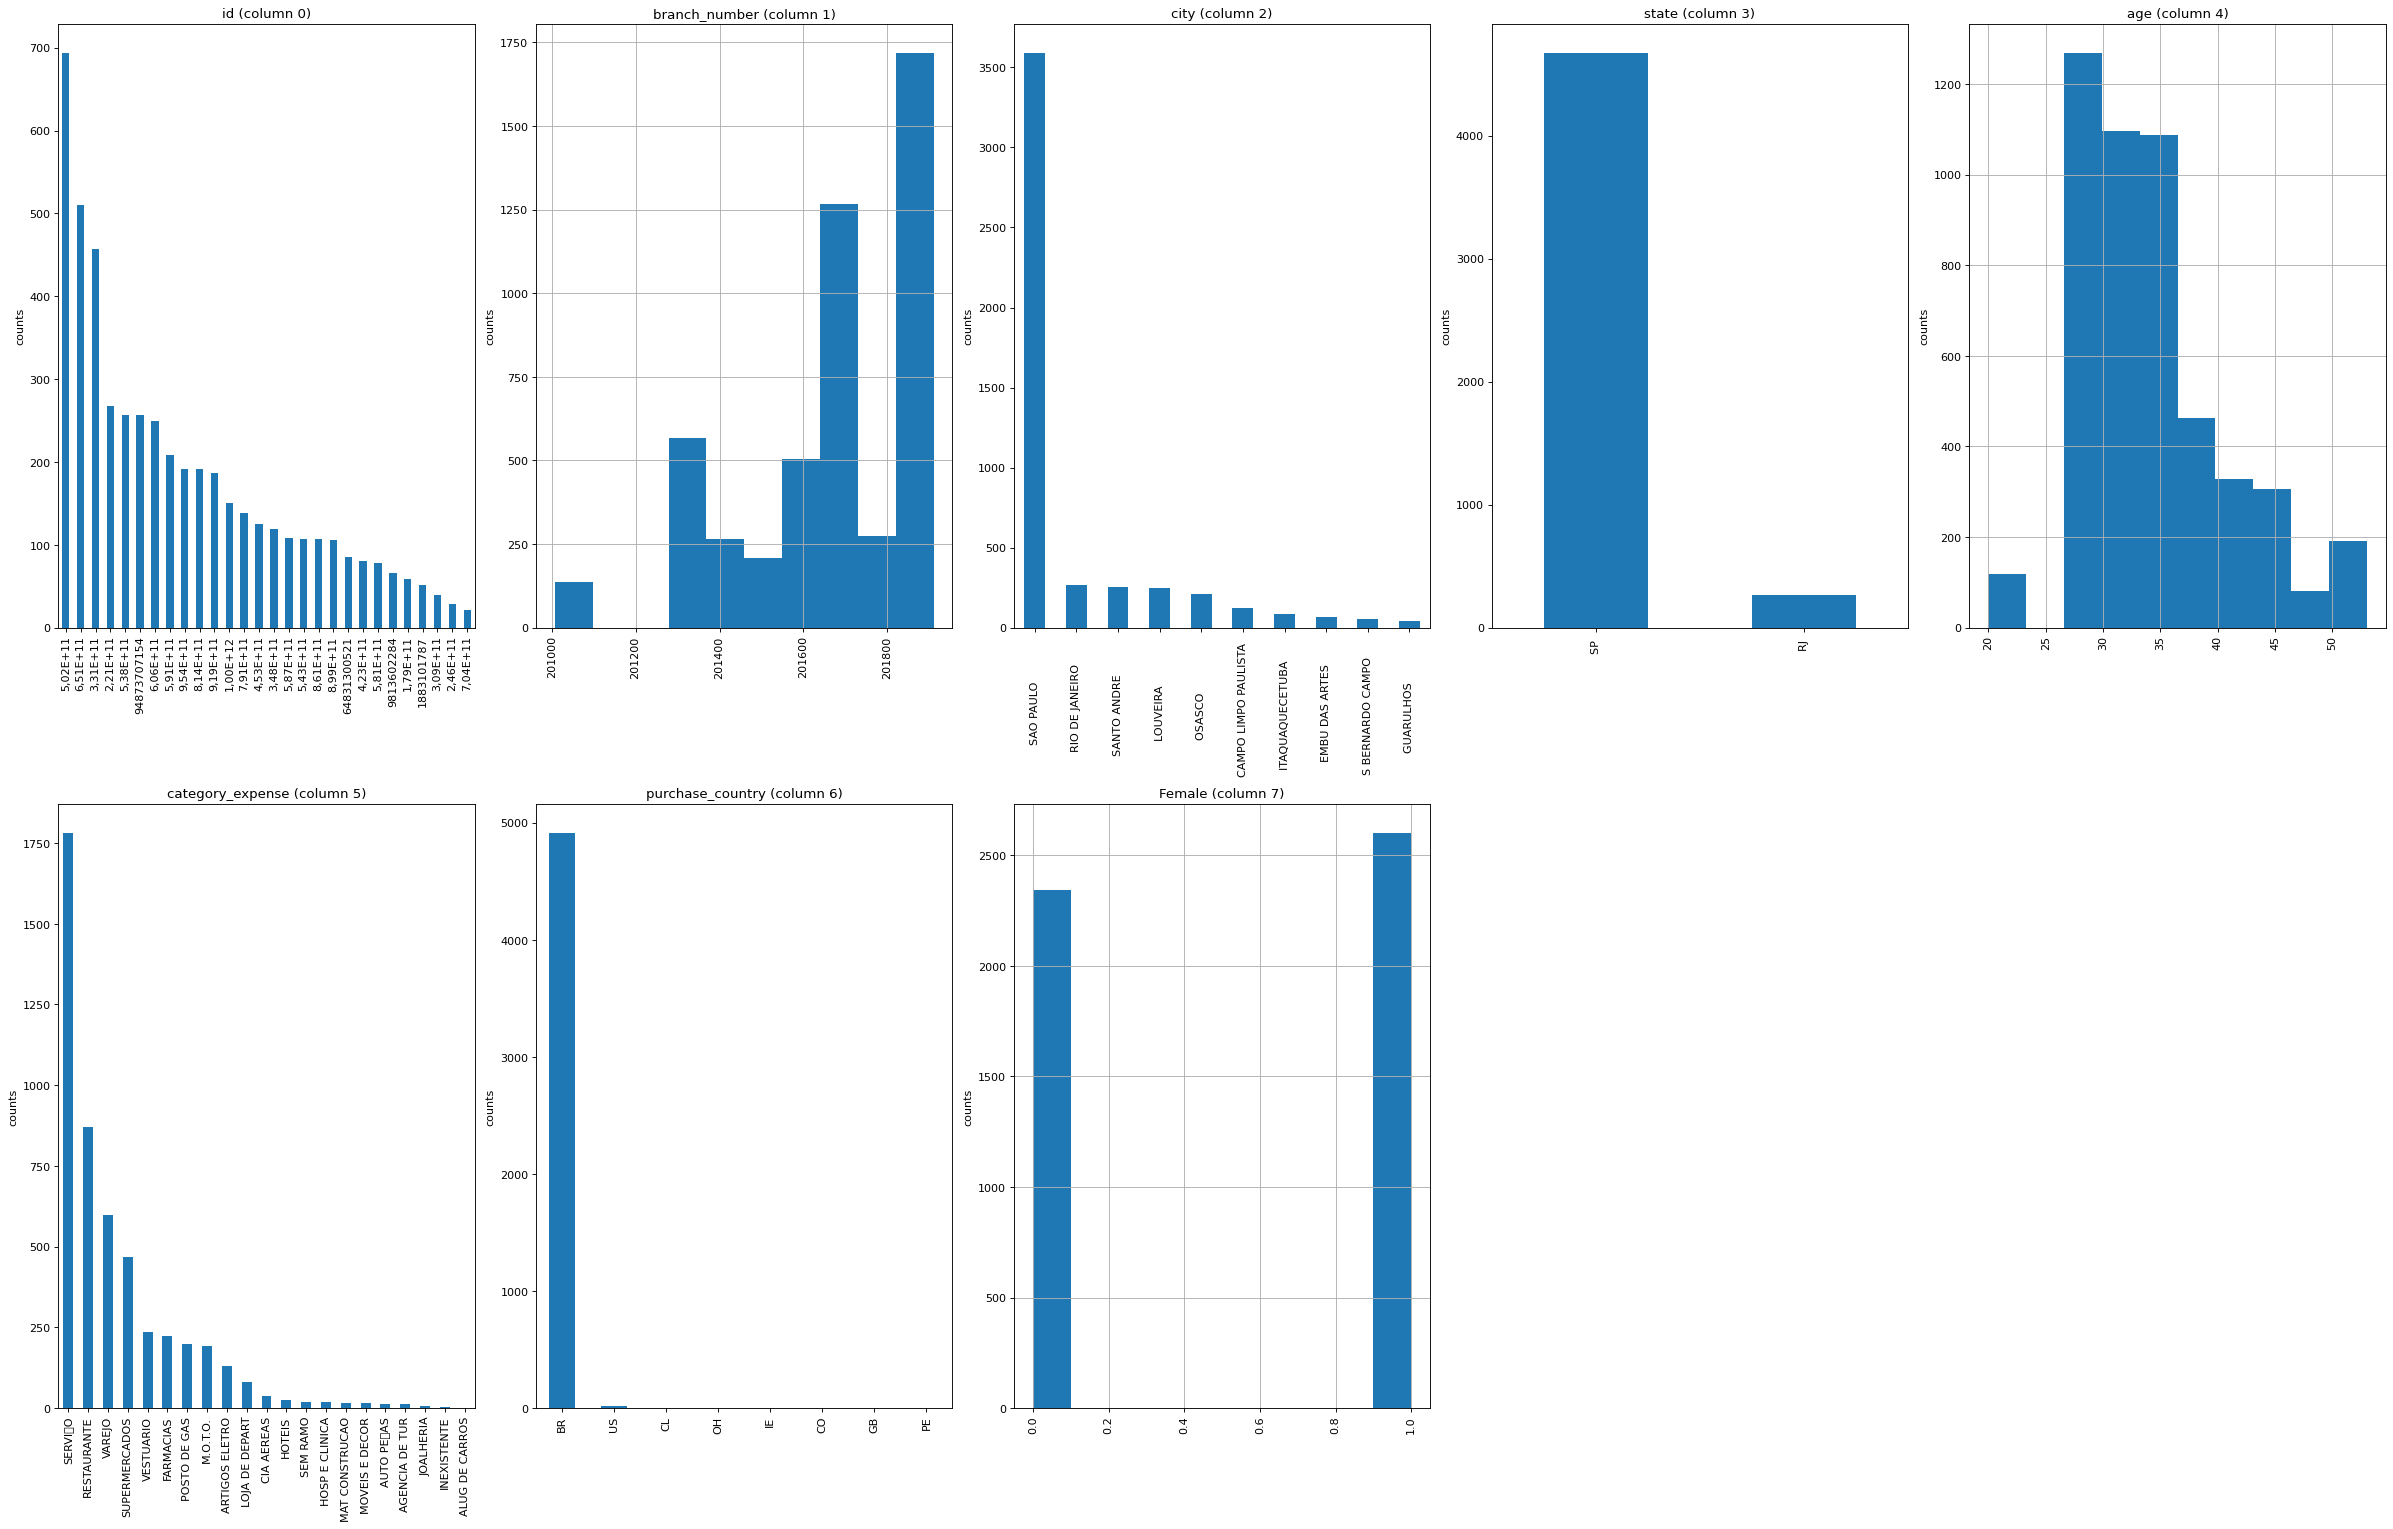

In [40]:
plotPerColumnDistribution(df, 10, 5)

In [41]:
df.corr()

,branch_number,age,total_credit_card_limit,current_available_limit,amount,Female
branch_number,1.000000,-0.365763,-0.194742,-0.335052,-0.005254,0.109896
age,-0.365763,1.000000,0.554631,0.519919,0.111993,-0.094320
total_credit_card_limit,-0.194742,0.554631,1.000000,0.938872,0.186453,-0.428910
current_available_limit,-0.335052,0.519919,0.938872,1.000000,0.114712,-0.407079
amount,-0.005254,0.111993,0.186453,0.114712,1.000000,-0.058389
Female,0.109896,-0.094320,-0.428910,-0.407079,-0.058389,1.000000


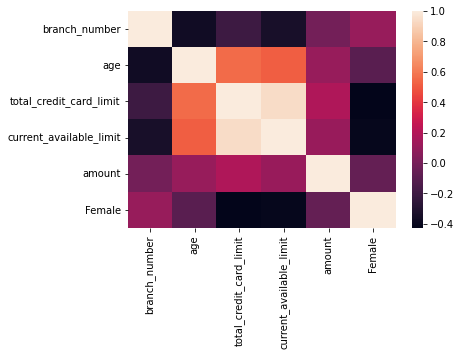

In [42]:
#correlation in a heatmap
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [43]:
df["id"].replace(customers['old_customer_name'].values,customers['new_customer_name'].values, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4942 entries, 0 to 4954
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4942 non-null   int64         
 1   branch_number            4942 non-null   int64         
 2   city                     4942 non-null   object        
 3   state                    4942 non-null   object        
 4   age                      4942 non-null   int64         
 5   total_credit_card_limit  4942 non-null   int64         
 6   current_available_limit  4942 non-null   int64         
 7   date                     4942 non-null   datetime64[ns]
 8   amount                   4942 non-null   float64       
 9   category_expense         4942 non-null   object        
 10  purchase_city            4935 non-null   object        
 11  purchase_country         4936 non-null   object        
 12  Female                   4942 non-

In [45]:

df.date = pd.to_datetime(df.date,dayfirst=True)

In [46]:

#want to look at the total spending of each customers
freq = df.groupby('id')[['amount']].count().sort_values('amount',ascending=False)
freq.rename(columns={'amount': 'Frequency'}, inplace=True)
freq

,Frequency
id,
11,694
5,510
16,457
26,268
14,257
6,257
19,249
3,209
15,192


In [47]:
total = df.groupby('id')[['amount']].sum().sort_values('amount',ascending=False)
total.rename(columns={'amount': 'Total_spending'}, inplace=True)
total

,Total_spending
id,
19,151744.49
13,46792.97
16,39500.85
26,37023.41
11,31114.48
4,25350.47
14,21523.28
15,19785.22
25,18700.03


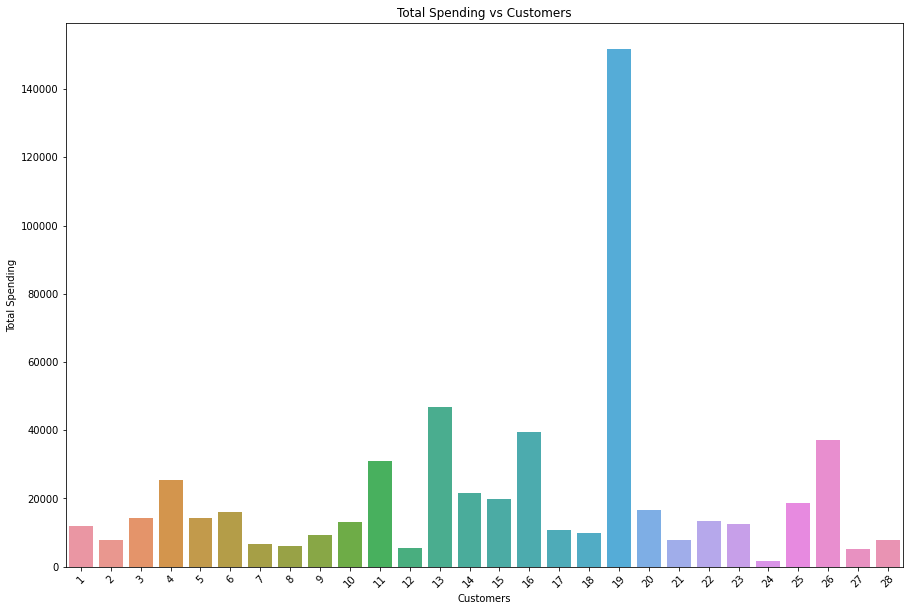

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(x=total.index,y=total['Total_spending'])
plt.xlabel('Customers')
plt.ylabel('Total Spending')
plt.title("Total Spending vs Customers")
plt.xticks(rotation= 45);

### As it is seen, the 19th customer is the person who spends the most among the customers.
### We are going to analize the exepenses according to covid crisis.

In [49]:
# pre covid
pre_covid = df[(df.date > '2020-01-01') & (df.date < '2020-03-18')]

#covid
covid = df[(df.date >= '2020-03-18')]


In [50]:
covid.head()

,id,branch_number,city,state,age,total_credit_card_limit,current_available_limit,date,amount,category_expense,purchase_city,purchase_country,Female
5,1,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2636,2020-05-05,44.90,ARTIGOS ELETRO,OSASCO,BR,1
7,1,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2789,2020-03-21,5.00,M.O.T.O.,SAO PAULO,BR,1
11,1,201405,CAMPO LIMPO PAULISTA,SP,37,4700,1706,2020-04-04,360.45,M.O.T.O.,LNKD.IN/BILL,IE,1
15,1,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2117,2020-04-01,26.00,SERVIO,CURITIBA,BR,1
29,1,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2770,2020-04-20,40.00,SERVIO,SAO PAULO,BR,1


In [51]:
covid_freq = covid.groupby('id')[['age']].count().sort_values('age',ascending=False)
covid_freq.columns = ['frequency']
print('average number of transactions frequency: ',covid_freq.frequency.mean())
print('max number of transactions frequency: ',covid_freq.frequency.max())
print('min number of transactions frequency: ',covid_freq.frequency.min())

average number of transactions frequency:  14.461538461538462
max number of transactions frequency:  35
min number of transactions frequency:  2


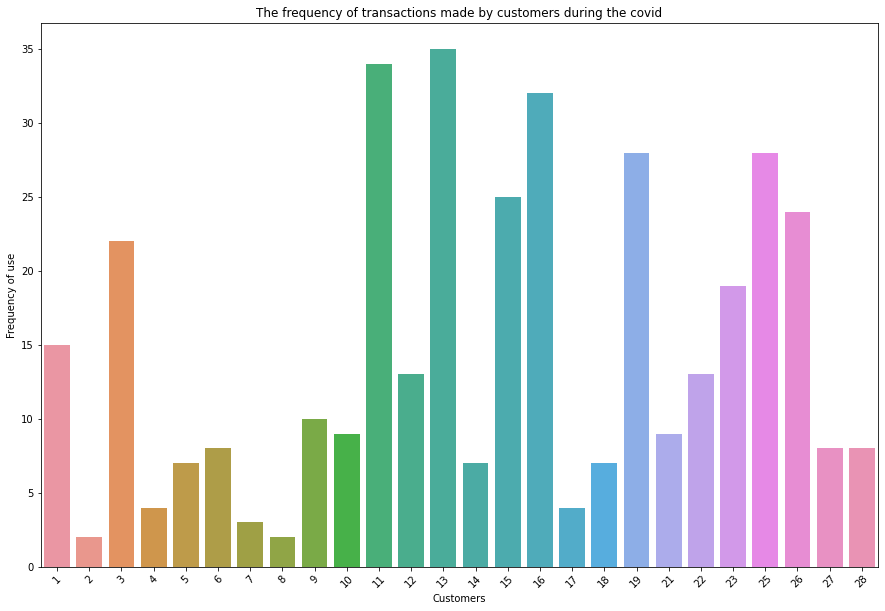

In [52]:
plt.figure(figsize=(15,10))
sns.barplot(x=covid_freq.index,y=covid_freq['frequency'])
plt.xlabel('Customers')
plt.ylabel('Frequency of use')
plt.title("The frequency of transactions made by customers during the covid")
plt.xticks(rotation= 45);

In [53]:
covid_freq

,frequency
id,
13,35
11,34
16,32
19,28
25,28
15,25
26,24
3,22
23,19


In [54]:
pre_covid_freq = pre_covid.groupby('id')[['age']].count().sort_values('age',ascending=False)
pre_covid_freq.columns = ['frequency']
print('average number of transactions frequency: ',pre_covid_freq.frequency.mean())
print('max number of transactions frequency: ',pre_covid_freq.frequency.max())
print('min number of transactions frequency: ',pre_covid_freq.frequency.min())

average number of transactions frequency:  39.65384615384615
max number of transactions frequency:  133
min number of transactions frequency:  5


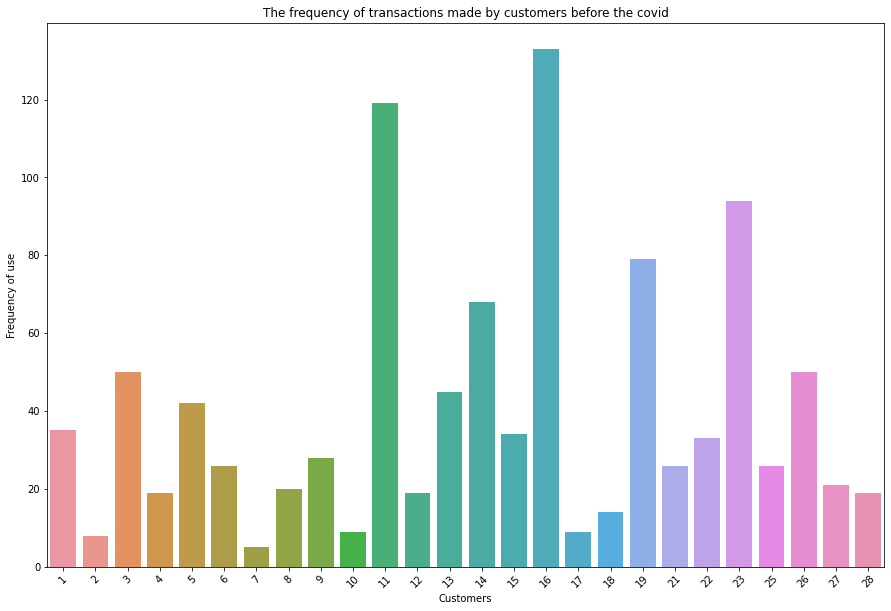

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(x=pre_covid_freq.index,y=pre_covid_freq['frequency'])
plt.xlabel('Customers')
plt.ylabel('Frequency of use')
plt.title("The frequency of transactions made by customers before the covid")
plt.xticks(rotation= 45);

In [56]:
pre_covid_freq

,frequency
id,
16,133
11,119
23,94
19,79
14,68
3,50
26,50
13,45
5,42


In [57]:
covid['category_expense'].value_counts()

SERVIO           97
VAREJO            73
RESTAURANTE       61
SUPERMERCADOS     39
FARMACIAS         27
M.O.T.O.          24
POSTO DE GAS      19
ARTIGOS ELETRO    13
LOJA DE DEPART     9
VESTUARIO          5
SEM RAMO           2
AUTO PEAS         2
MAT CONSTRUCAO     2
MOVEIS E DECOR     2
HOSP E CLINICA     1
Name: category_expense, dtype: int64

In [58]:
essential_list = ['FARMACIAS','VAREJO','HOSP E CLINICA','SUPERMERCADOS','POSTO DE GAS','TRANS FINANC']

non_essential_list = ['SERVI\x82O','M.O.T.O.','ARTIGOS ELETRO','LOJA DE DEPART','VESTUARIO','SEM RAMO','MAT CONSTRUCAO','RESTAURANTE','CIA AEREAS','MOVEIS E DECOR','JOALHERIA','AGENCIA DE TUR','HOTEIS','AUTO PE AS','INEXISTENTE','']

In [59]:
covid[covid.category_expense.isin(essential_list)]['category_expense'].value_counts()

VAREJO            73
SUPERMERCADOS     39
FARMACIAS         27
POSTO DE GAS      19
HOSP E CLINICA     1
Name: category_expense, dtype: int64

In [60]:
print('Total spending during covid: ',covid['amount'].sum(),'Brazillian R')
print('Total spending in essential category during covid',covid[covid.category_expense.isin(essential_list)]['amount'].sum(),'Brazillian R')
print('Essential : %',covid[covid.category_expense.isin(essential_list)]['amount'].sum() * 100 / covid['amount'].sum())
essential_covid = covid[covid.category_expense.isin(essential_list)]['amount'].sum() * 100 / covid['amount'].sum()

Total spending during covid:  44802.19 Brazillian R
Total spending in essential category during covid 20816.75 Brazillian R
Essential : % 46.463688493799076


In [61]:
covid[covid.category_expense.isin(non_essential_list)]['category_expense'].value_counts()

SERVIO           97
RESTAURANTE       61
M.O.T.O.          24
ARTIGOS ELETRO    13
LOJA DE DEPART     9
VESTUARIO          5
SEM RAMO           2
MAT CONSTRUCAO     2
MOVEIS E DECOR     2
Name: category_expense, dtype: int64

In [ ]:
# % of non essential
print('Total spending during covid: ',covid['amount'].sum(),'Brazillian R')
print('Total spending in non essential category during covid',covid[covid.category_expense.isin(non_essential_list)]['amount'].sum(),'Brazillian R')
print('Non - Essential : %',covid[covid.category_expense.isin(non_essential_list)]['amount'].sum() * 100 / covid['amount'].sum())
non_essential_covid = covid[covid.category_expense.isin(non_essential_list)]['amount'].sum() * 100 / covid['amount'].sum()

Total spending during covid:  44802.19 Brazillian R
Total spending in non essential category during covid 23524.269999999997 Brazillian R
Non - Essential : % 52.5069645032977


In [62]:
#%%of essential
covid[covid.category_expense.isin(essential_list)]['category_expense'].value_counts()[:3]

VAREJO           73
SUPERMERCADOS    39
FARMACIAS        27
Name: category_expense, dtype: int64

In [63]:
pre_covid[pre_covid.category_expense.isin(non_essential_list)]['category_expense'].value_counts()[:3]

SERVIO        356
RESTAURANTE    170
VESTUARIO       52
Name: category_expense, dtype: int64

In [64]:
# The lowest paid spending and category of each customers before covid

for i in range(1,30):
    print(pre_covid[pre_covid['id'] == i].sort_values('amount')[:3][['category_expense','amount']].set_index(pre_covid[pre_covid['id'] == i]['id'][:3]))

   category_expense  amount
id                         
1          M.O.T.O.    2.00
1          M.O.T.O.    5.00
1           SERVIO    5.68
   category_expense  amount
id                         
2          SEM RAMO   22.35
2    ARTIGOS ELETRO   22.35
2    ARTIGOS ELETRO   22.35
   category_expense  amount
id                         
3           SERVIO    6.68
3           SERVIO    7.08
3           SERVIO    7.34
   category_expense  amount
id                         
4          M.O.T.O.    43.8
4      POSTO DE GAS    50.0
4      POSTO DE GAS    50.0
   category_expense  amount
id                         
5           SERVIO    7.43
5           SERVIO    7.51
5           SERVIO    7.60
   category_expense  amount
id                         
6           SERVIO    8.29
6     SUPERMERCADOS   11.50
6           SERVIO   12.91
   category_expense  amount
id                         
7           SERVIO   50.00
7         VESTUARIO   74.99
7            VAREJO  139.98
   category_expense 

In [65]:
# The lowest paid spending and category of each customers before covid

for i in range(1,30):
    print(pre_covid[pre_covid['id'] == i].sort_values('amount',ascending=False)[:3][['category_expense','amount']].set_index(pre_covid[pre_covid['id'] == i]['id'][:3]))

   category_expense   amount
id                          
1    HOSP E CLINICA  1260.00
1          M.O.T.O.   579.98
1           SERVIO   250.00
   category_expense  amount
id                         
2            VAREJO   195.0
2          M.O.T.O.    89.9
2          M.O.T.O.    89.9
   category_expense  amount
id                         
3    LOJA DE DEPART  528.23
3     SUPERMERCADOS  465.27
3     SUPERMERCADOS  367.59
   category_expense  amount
id                         
4            VAREJO  4320.0
4    MOVEIS E DECOR  1290.0
4       RESTAURANTE   456.5
   category_expense   amount
id                          
5            HOTEIS  1400.00
5     SUPERMERCADOS   200.20
5       RESTAURANTE   176.88
   category_expense  amount
id                         
6         VESTUARIO  344.00
6         VESTUARIO  179.99
6    ARTIGOS ELETRO  149.00
   category_expense  amount
id                         
7        CIA AEREAS  984.61
7         VESTUARIO  211.80
7            VAREJO  139.98
   categor

In [66]:
freq = pd.concat([covid_freq.sort_index(),pre_covid_freq.sort_index()],axis=1)
freq.columns = ['covid_freq','pre_covid_freq']

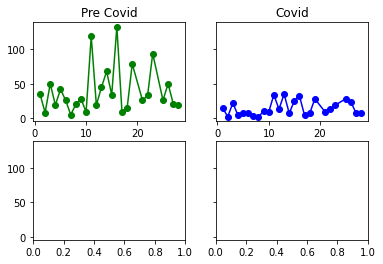

In [67]:
# The frequency of using credit card for each customer before covid vs during covid


fig, ax = plt.subplots(2,2,sharey=True)


ax[0,0].plot(pre_covid_freq.sort_index().index,pre_covid_freq.sort_index().values,color='g',marker='o')
ax[0,0].set_title('Pre Covid')


ax[0,1].plot(covid_freq.sort_index().index,covid_freq.sort_index().values,color='b',marker='o')
ax[0,1].set_title('Covid')

plt.show();

In [68]:
import plotly.graph_objs as go
#import chart_studio.plotly as py


fig = go.Figure()
fig.add_trace(go.Box(y=freq.covid_freq, name='The frequency of using credit card for each customer during covid',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=freq.pre_covid_freq, name = 'The frequency of using credit card for each customer before covid',
                marker_color = 'lightseagreen'))

fig.show()

In [69]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go


# Creating trace1
trace1 = go.Scatter(
                    x = freq.index,
                    y = freq.covid_freq,
                    mode = "lines",
                    name = "Covid Freq",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= freq.covid_freq)
# Creating trace2
trace2 = go.Scatter(
                    x = freq.index,
                    y = freq.pre_covid_freq,
                    mode = "lines+markers",
                    name = "Pre Covidreq",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= freq.pre_covid_freq)
data = [trace1, trace2]
layout = dict(title = 'The frequency of using credit card for each customer before covid vs during covid',
              xaxis= dict(title= 'Customers',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)


In [70]:
df.corr()

,id,branch_number,age,total_credit_card_limit,current_available_limit,amount,Female
id,1.000000,-0.178432,0.205862,0.431043,0.425183,0.059863,-0.429397
branch_number,-0.178432,1.000000,-0.365763,-0.194742,-0.335052,-0.005254,0.109896
age,0.205862,-0.365763,1.000000,0.554631,0.519919,0.111993,-0.094320
total_credit_card_limit,0.431043,-0.194742,0.554631,1.000000,0.938872,0.186453,-0.428910
current_available_limit,0.425183,-0.335052,0.519919,0.938872,1.000000,0.114712,-0.407079
amount,0.059863,-0.005254,0.111993,0.186453,0.114712,1.000000,-0.058389
Female,-0.429397,0.109896,-0.094320,-0.428910,-0.407079,-0.058389,1.000000


###I would take the variables 'total_credit_card_limit', 'current_available_limit' and 'age'. When we look at the correlation matrix, the relationship between them is the most in these 3 variables to evaluate the risk

In [71]:
df

,id,branch_number,city,state,age,total_credit_card_limit,current_available_limit,date,amount,category_expense,purchase_city,purchase_country,Female
0,1,201405,CAMPO LIMPO PAULISTA,SP,37,4700,5605,2019-12-04,31.00,SERVIO,SAO PAULO,BR,1
1,1,201405,CAMPO LIMPO PAULISTA,SP,37,4700,5343,2019-11-09,150.01,FARMACIAS,SANTOS,BR,1
2,1,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2829,2019-05-06,50.00,SERVIO,SAO PAULO,BR,1
3,1,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2547,2019-06-01,54.40,M.O.T.O.,OSASCO,BR,1
4,1,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2515,2019-06-01,32.79,M.O.T.O.,OSASCO,BR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,23,201910,SAO PAULO,SP,37,8500,5305,2020-01-23,25.50,RESTAURANTE,SAO PAULO,BR,0
4951,23,201910,SAO PAULO,SP,37,8500,5266,2020-01-23,39.50,SUPERMERCADOS,SAO PAULO,BR,0
4952,23,201910,SAO PAULO,SP,37,8500,5445,2020-02-19,75.56,RESTAURANTE,SAO PAULO,BR,0
4953,23,201910,SAO PAULO,SP,37,8500,5002,2020-03-30,5.90,SERVIO,SAO PAULO,BR,0


In [72]:
y = df['total_credit_card_limit'].astype(int)
x = df[['age','current_available_limit']]

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x))

In [75]:
X_train, X_pre_test, y_train, y_pre_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Focus that we are using X_pre_test and y_pre_test. Also test_size is fixed to 0.5

X_val, X_test, y_val, y_test = train_test_split(X_pre_test, y_pre_test , test_size=0.5, random_state=123)  

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression()

In [78]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [79]:
pred = model.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
score = accuracy_score(y_test, pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.49292929292929294


In [82]:
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
accuracy = confusion_matrix(y_test, pred)
print('The Accuracy of Classifier: \n', accuracy)

The Accuracy of Classifier: 
 [[ 5  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  4]
 [ 0  0  0 ...  0 31  0]
 [ 0  0  0 ...  3  0 28]]


###The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.The best value is 1 and the worst value is 0.

###The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

###The F-1 score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

In [84]:
matrix = classification_report(y_test, pred)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

         500       1.00      1.00      1.00         5
        1420       1.00      1.00      1.00        13
        1500       0.00      0.00      0.00         1
        1600       0.00      0.00      0.00         1
        1750       0.00      0.00      0.00         3
        1900       0.00      0.00      0.00         1
        2011       0.00      0.00      0.00         6
        2200       0.33      0.24      0.28        21
        2500       0.00      0.00      0.00         3
        2508       0.00      0.00      0.00         2
        2700       0.00      0.00      0.00        22
        3200       0.00      0.00      0.00         2
        3400       0.00      0.00      0.00         2
        3500       0.00      0.00      0.00         6
        3600       0.00      0.00      0.00         4
        3650       0.57      1.00      0.73        49
        3700       0.00      0.00      0.00        14
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [87]:
#from sklearn.metrics import roc_auc_score, roc_curve

In [89]:
#auc_score = roc_auc_score(y_test, pred)
#auc_score

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rfc = RandomForestClassifier()

In [96]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
rfc_pred = rfc.predict(X_test)

##The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

##In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [99]:
score = accuracy_score(y_test, rfc_pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.7252525252525253


In [103]:
#XgBoost Classifier
import xgboost

#Hyper parameter tuning models
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [106]:
baseline_model = xgboost.XGBClassifier()

In [107]:
#Fitting data to the model
baseline_model.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [108]:
#Training accuracy
baseline_model.score(X_train,y_train)

0.8603642671292281

In [109]:
#Predictions
baseline_preds = baseline_model.predict(X_test)

In [113]:
#Evaluation Metrics
from sklearn.metrics import confusion_matrix , classification_report

In [114]:
#Confusion metrics
print(confusion_matrix(y_test,baseline_preds))

[[ 0  2  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 82  0]
 [ 0  0  0 ...  0  0 72]]


In [112]:
#Classification Report
print(classification_report(y_test,baseline_preds))

              precision    recall  f1-score   support

         400       0.00      0.00      0.00         2
         500       0.95      1.00      0.97        35
        1200       0.00      0.00      0.00         2
        1358       0.00      0.00      0.00         3
        1420       1.00      1.00      1.00        32
        1500       0.00      0.00      0.00         1
        1600       0.33      0.86      0.48         7
        1750       0.00      0.00      0.00         4
        1850       0.25      1.00      0.40         1
        1900       0.00      0.00      0.00         1
        2005       0.00      0.00      0.00         1
        2011       0.56      0.50      0.53        18
        2065       0.00      0.00      0.00         1
        2158       0.00      0.00      0.00         1
        2200       0.63      0.71      0.67        65
        2500       0.00      0.00      0.00         4
        2508       0.00      0.00      0.00         8
        2700       0.88    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Hyper Parameter Tuning (RandomizedSearchCV)

In [115]:
xgb_params = {
            'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
            'max_depth'     : [3,4,5,6,8,10,12,15],
            'min_child_weight' : [1,3,5,7],
            'gamma' : [0.0,0.1,0.2,0.3,0.4],
            'colsample_bytree' : [0.3,0.4,0.5,0.7]    
            }

In [116]:
rs_xgb_model = RandomizedSearchCV(xgboost.XGBClassifier(),xgb_params,n_iter=5,scoring = 'accuracy',cv=5,verbose=2) 

In [117]:
rs_xgb_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   3.3s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   2.8s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   2.8s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   2.8s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   2.8s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3; total time=   3.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3; total time=   3.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3; total time=   3.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3

RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=2)

In [118]:
#Best Parameters
rs_xgb_model.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 5}

In [119]:
#Best Estimators
rs_xgb_model.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.4, max_depth=10, min_child_weight=5,
              objective='multi:softprob')

In [120]:
# Training Score
rs_xgb_model.score(X_train,y_train)

0.8496675339693553

In [121]:
# Testing score
rs_xgb_model.score(X_test,y_test)

0.7680377612946729

##Tuned Model

In [123]:
#Retrieved from best estimators (Randomized search cv)
xgb_tuned_model=xgboost.XGBClassifier(min_child_weight=1,max_depth=10,learning_rate=0.05, gamma=0.1,colsample_bytree=0.5)

In [124]:
#Fitting data
xgb_tuned_model.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10,
              objective='multi:softprob')

In [125]:
#Training score
xgb_tuned_model.score(X_train,y_train)

0.8866724486845909

In [126]:
#Testing score
xgb_tuned_model.score(X_test,y_test)

0.75118004045853

In [128]:
#Predictions
tuned_preds = xgb_tuned_model.predict(X_test)

In [129]:
#Confusion matrix
print(confusion_matrix(y_test,tuned_preds))

[[ 0  2  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 82  0]
 [ 0  0  0 ...  0  0 72]]


In [130]:
#Classification Report
print(classification_report(y_test,tuned_preds))

              precision    recall  f1-score   support

         400       0.00      0.00      0.00         2
         500       0.95      1.00      0.97        35
        1200       0.00      0.00      0.00         2
        1358       0.00      0.00      0.00         3
        1420       1.00      1.00      1.00        32
        1500       0.00      0.00      0.00         1
        1600       0.00      0.00      0.00         7
        1750       0.00      0.00      0.00         4
        1850       0.25      1.00      0.40         1
        1900       0.00      0.00      0.00         1
        2005       0.00      0.00      0.00         1
        2011       0.50      0.56      0.53        18
        2065       0.00      0.00      0.00         1
        2158       0.00      0.00      0.00         1
        2200       0.58      0.58      0.58        65
        2500       0.00      0.00      0.00         4
        2508       0.00      0.00      0.00         8
        2700       0.68    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Cross Validation Score

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
cv_score = cross_val_score(xgb_tuned_model,X_train,y_train,cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



In [133]:
np.mean(cv_score)

0.7652525760241267

In [134]:
xgb_tuned_model.fit(X,y)

XGBClassifier(colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10,
              objective='multi:softprob')

In [135]:
#evaluate score
xgb_tuned_model.score(X,y)

0.877175232699312

###Return the mean accuracy on the given test data and labels.In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

###References
###https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=score#sklearn.ensemble.RandomForestClassifier.score
###https://scikit-learn.org/stable/modules/model_evaluation.htmlaccuracy-score
####https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html?highlight=from%20sklearn%20model_selection%20import%20cross_val_score
###https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support


###Brier1950G. Brier, Verification of forecasts expressed in terms of probability, Monthly weather review 78.1 (1950)

###Bella2012(1,2)Bella, Ferri, Hernández-Orallo, and Ramírez-Quintana “Calibration of Machine Learning Models” in Khosrow-Pour, M. “Machine learning: concepts, methodologies, tools and applications.” Hershey, PA: Information Science Reference (2012).

###Flach2008Flach, Peter, and Edson Matsubara. “On classification, ranking, and probability estimation.” Dagstuhl Seminar Proceedings. Schloss Dagstuhl-Leibniz-Zentrum fr Informatik (2008).